In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('googleplaystore.csv')

In [18]:
data.head()
# Display the first few rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [20]:
# Summary statistics of numerical columns
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [21]:
# Check for missing values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [22]:
# Handle missing values (e.g., filling or dropping)
data['Rating'].fillna(data['Rating'].mean(), inplace=True)
data.dropna(subset=['App', 'Category'], inplace=True)

C:\Users\nsmeg\AppData\Local\Temp\ipykernel_48976\1661943431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].mean(), inplace=True)


In [23]:
# First, make sure non-numeric values are converted to NaN
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Now you can safely convert to int, but first drop or fill NaNs
data['Reviews'] = data['Reviews'].fillna(0).astype(int)

# Convert 'Installs' column: remove ',' and '+', then convert
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce').fillna(0).astype(int)

# Convert 'Price' column: remove '$', then convert
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce').fillna(0.0)


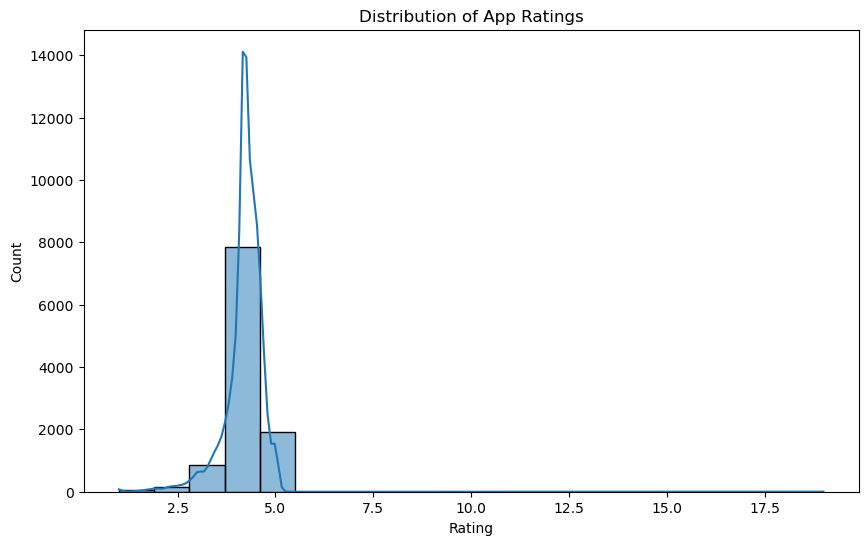

In [24]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()

In [25]:
# Average rating by category
avg_rating_by_category = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_by_category)

Category
1.9                    19.000000
EDUCATION               4.387778
EVENTS                  4.363647
ART_AND_DESIGN          4.350462
BOOKS_AND_REFERENCE     4.311026
PERSONALIZATION         4.307603
GAME                    4.282506
PARENTING               4.282223
HEALTH_AND_FITNESS      4.266296
BEAUTY                  4.260882
SHOPPING                4.254052
SOCIAL                  4.248001
WEATHER                 4.239675
SPORTS                  4.218404
PRODUCTIVITY            4.208287
HOUSE_AND_HOME          4.196819
FAMILY                  4.192394
PHOTOGRAPHY             4.192179
AUTO_AND_VEHICLES       4.190824
MEDICAL                 4.190167
LIBRARIES_AND_DEMO      4.181962
FOOD_AND_DRINK          4.170709
COMMUNICATION           4.163842
COMICS                  4.156445
BUSINESS                4.145987
NEWS_AND_MAGAZINES      4.142993
FINANCE                 4.139108
ENTERTAINMENT           4.126174
TRAVEL_AND_LOCAL        4.119716
LIFESTYLE               4.112427
V

In [26]:
# Most popular apps (by installs)
most_installed_apps = data[['App','Installs']].sort_values(by='Installs',ascending=False).head(10)
print(most_installed_apps)

                                           App    Installs
3896                            Subway Surfers  1000000000
3943                                  Facebook  1000000000
335   Messenger – Text and Video Chat for Free  1000000000
3523                              Google Drive  1000000000
3565                              Google Drive  1000000000
2884                             Google Photos  1000000000
3665                                   YouTube  1000000000
2853                             Google Photos  1000000000
4234             Skype - free IM & video calls  1000000000
3687                   Google Play Movies & TV  1000000000


In [28]:
# Top 5 genres
top_genres = data['Genres'].value_counts().head(5)
print(top_genres)

Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64
